## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D

%matplotlib inline

## EDA

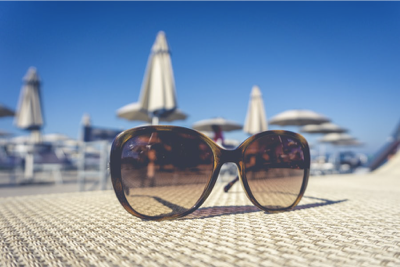

In [8]:
im1 = Image.open("Project files/data/Glasses/glasses135.jpg")
im1

In [9]:
np.array(im1).shape

(267, 400, 4)

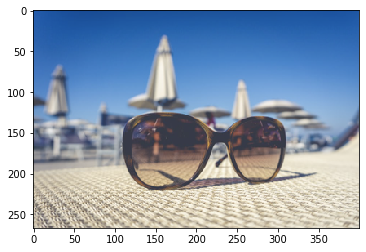

In [10]:
plt.imshow(np.array(im1)[:,:,0:3])

In [12]:
def crop_center(arr, side_length):
    y,x,_ = arr.shape
    startx = x//2 - side_length//2
    endx = x//2 + side_length//2
    
    starty = y//2 - side_length//2
    endy = y//2 + side_length//2
    
    return arr[starty:endy, startx:endx, :]

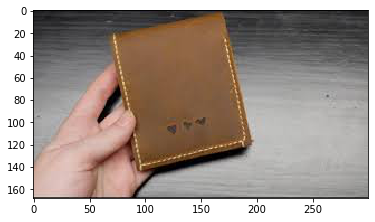

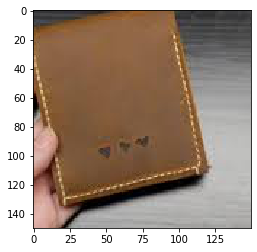

(168, 300, 3)


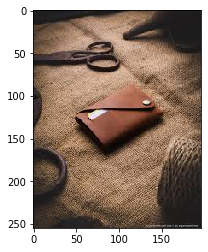

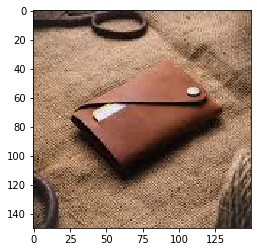

(255, 197, 3)


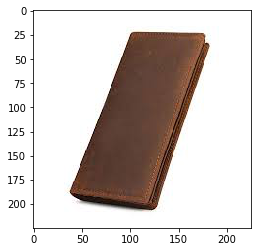

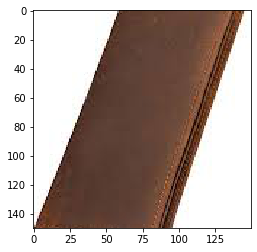

(225, 225, 3)


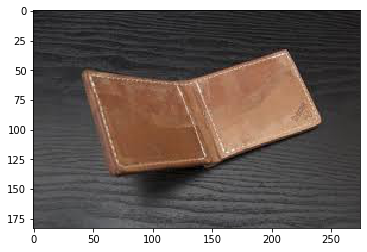

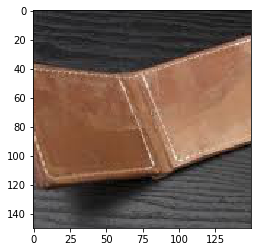

(183, 275, 3)


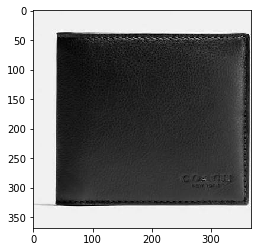

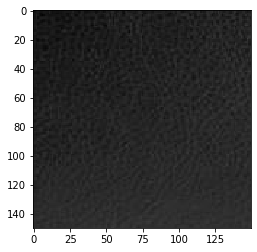

(368, 368, 3)


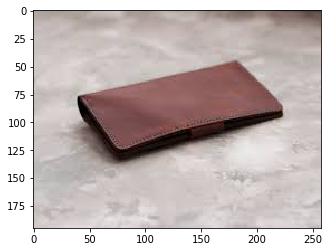

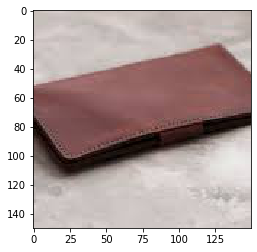

(195, 258, 3)


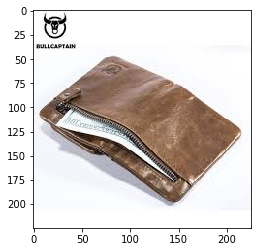

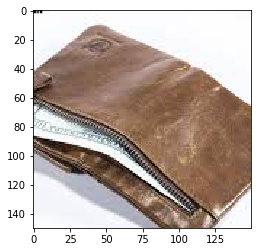

(225, 225, 3)


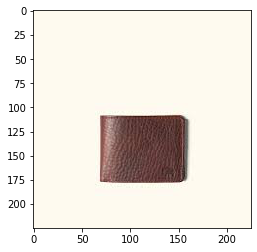

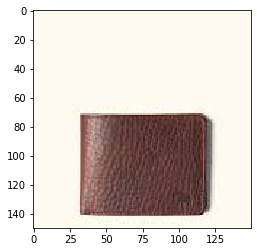

(225, 225, 3)


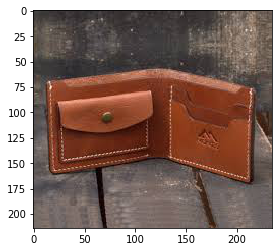

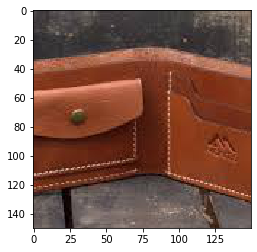

(214, 235, 3)


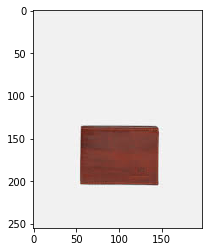

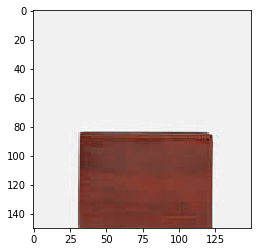

(255, 198, 3)


In [14]:
file_path = "Project files/data/wallets/"
names = os.listdir(file_path)

i = 0
for n in names:
    i+=1
    arr = np.array(Image.open(file_path+n))
    croped = crop_center(arr,150)
    plt.imshow(arr)
    plt.show();
    plt.imshow(croped)
    plt.show();
    print(arr.shape)
    if i>= 10:
        break;
#     print("dim: ", np.min([arr.shape[0], arr.shape[1]]), np.min([arr.shape[0]/arr.shape[1], arr.shape[1]/arr.shape[0]]))

## neural network (CNN)

In [ ]:
input_nn = Input( shape = (150,150,3) )
x = Conv2D(32, (3,3), activation = "relu", padding='same')(input_nn)
x = Conv2D(32, (3,3), activation = "relu", padding='same')(x)
x = Flatten()(x)
x = Dense(32, activation = "relu")(x)
x = Dense(16, activation = "relu")(x)
nn_out = Dense(3, activation='softmax')(x)

nn = Model(input_nn, nn_out)
nn.compile(optimizer='adam', loss='categorical_crossentropy')
print(nn.summary())

history_nn = nn.fit(X_train, y_train, epochs=20, verbose=0)

In [ ]:
(0,.2,.3,.5) 